### 무게를 찾기
- 목 표 : 농어(Perch) 길이 피쳐를 사용해서 무게를 예측하기
- 데이터셋 : fish.csv
- 피쳐/속성 : Length
- 타겟/라벨 : Weight

[1] 데이터 준비 및 피쳐/타겟 분석

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_FILE = '../Data/fish.csv'

In [4]:
# 농어(Perch) Length, Weight 확인
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [5]:
PerchDF = fishDF[fishDF['Species'] == 'Perch']
PerchDF.head()

,Species,Weight,Length
72,Perch,5.9,8.4
73,Perch,32.0,13.7
74,Perch,40.0,15.0
75,Perch,51.5,16.2
76,Perch,70.0,17.4


In [6]:
PerchDF['Species'].unique()

array(['Perch'], dtype=object)

In [7]:
PerchDF = PerchDF.drop('Species', axis=1).copy()
PerchDF.head()

,Weight,Length
72,5.9,8.4
73,32.0,13.7
74,40.0,15.0
75,51.5,16.2
76,70.0,17.4


[1-1] 피쳐분석 ==> 상관계수값, 시각화 2가지 모두 고려

In [8]:
# 상관계수값 확인

PerchDF.corr()

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


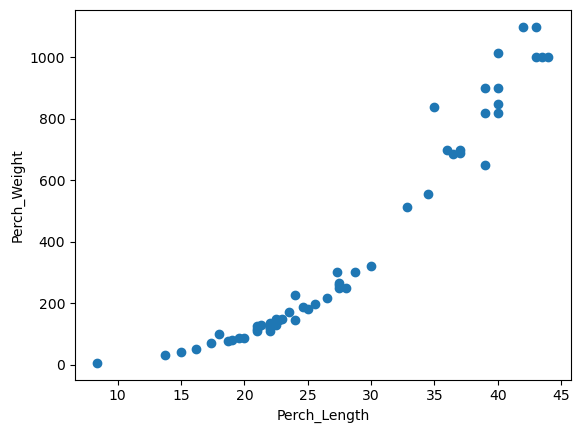

In [9]:
# 시각화 확인

plt.scatter(PerchDF['Length'], PerchDF['Weight'])
plt.xlabel('Perch_Length')
plt.ylabel('Perch_Weight')
plt.show()

[2] 학습 준비
- 학습알고리즘 : KNN Regressor
- 피쳐 : 스케일링
- 학습용/테스트용 데이터셋 분리

[2-1] 피쳐와 타겟 분리

In [10]:
features = PerchDF[['Length']]
target = PerchDF['Weight']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (56, 1), 2D
target => (56,), 1D


[2-2] 학습용/테스트용 데이터셋 분리
- 전체 데이터셋 => 학습용/테스트용 비율 (75:25[default], 80:20, 70:30, ...)
- 회귀 데이터셋 => 데이터셋 구성 요소에 대한 비율은 고려 X

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# train:test = 80:20 ==> test_size=0.2 또는 train_size=0.8
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [48]:
x_train=x_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

x_test=x_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [13]:
print(f'x_train:{x_train.shape}, {x_train.ndim}D')
print(f'y_train:{y_train.shape}, {y_train.ndim}D')

print(f'x_test:{x_test.shape}, {x_test.ndim}D')
print(f'y_test:{y_test.shape}, {y_test.ndim}D')

x_train:(44, 1), 2D
y_train:(44,), 1D
x_test:(12, 1), 2D
y_test:(12,), 1D


[2-3] 피쳐 스케일링

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [16]:
# 스케일러 데이터셋 전용에 속성값 설정
mmScaler.fit(x_train)

MinMaxScaler()

In [17]:
mmScaler.min_, mmScaler.scale_, mmScaler.data_min_, mmScaler.data_max_

(array([-0.23595506]), array([0.02808989]), array([8.4]), array([44.]))

In [18]:
# 학습용, 테스트용 데이터셋 스케일링 진행
x_train_scaled = mmScaler.transform(x_train)
x_test_scaled = mmScaler.transform(x_test)

[3] 학습 진행

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# 학습 모델 인스턴스 생성
model = KNeighborsRegressor()

# 학습용 데이터셋으로 학습 진행
model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [20]:
# 모델 파라미터 => 학습 후 즉, fit() 실행 후 설정되는 매개변수
model.n_features_in_, model.n_samples_fit_, model.effective_metric_, model.effective_metric_params_

(1, 44, 'euclidean', {})

[4] 최적의 K 찾기

In [22]:
scores={}
for k in range(1, model.n_samples_fit_+1):
    # 최근접 이웃의 갯수 설정 => 모델 성능 좌우 : 하이퍼 파라미터
    model.n_neighbors=k

    # 성능 평가
    score=model.score(x_test_scaled, y_test)
    scores[k]=score

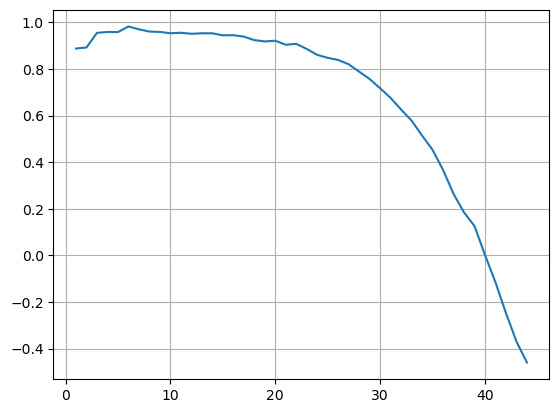

In [24]:
plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

In [26]:
# 최고 성능의 K값
best_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]
best_k

6

In [27]:
# 모델에 적용 => n_neighbors에 설정
model.n_neighbors=best_k

[5] 새로운 데이터의 무게 예측하기

In [31]:
new_length = input('농어 길이 : ')

In [32]:
print(f'new_length : {new_length}')

new_length : 44


In [33]:
# 2D 적용
dataDF = pd.DataFrame([[new_length]], columns=['Length'])
dataDF

,Length
0,44


In [35]:
# 피쳐 스케일링 적용
data_scaled = mmScaler.transform(dataDF)

In [36]:
# 예측
model.predict(data_scaled)

array([1003.33333333])

In [37]:
distance, index = model.kneighbors(data_scaled)

print(distance, index, sep='\n')

[[0.         0.01404494 0.02808989 0.02808989 0.05617978 0.11235955]]
[[33 29  5 32 17  9]]


In [39]:
x_train.iloc[index.reshape(-1)]

,Length
127,44.0
126,43.5
125,43.0
124,43.0
123,42.0
122,40.0


In [42]:
x_train_scaled[32]

array([0.97191011])

In [43]:
y_train.index

Index([ 92, 107,  79,  78, 115, 125, 117,  82, 110, 122,  90,  76,  73,  84,
       119,  94, 103, 123,  91, 111,  77,  85,  86, 118, 105,  96,  83, 113,
        88, 126, 112, 114, 124, 127,  80, 120, 101,  97, 100, 121,  72,  87,
       108,  81],
      dtype='int64')

In [47]:
y_test.index

Index([102, 75, 104, 99, 93, 89, 116, 74, 95, 98, 106, 109], dtype='int64')

In [49]:
x_train.index

RangeIndex(start=0, stop=44, step=1)

In [50]:
x_test.index

RangeIndex(start=0, stop=12, step=1)

In [53]:
y_train[index.reshape(-1)].sum()/model.n_neighbors

1003.3333333333334

### KNN Regressor 문제점/단점

In [62]:
# 임의의 데이터
new_length = 4

# 2D 적용
dataDF = pd.DataFrame([[new_length]], columns=['Length'])

# 피쳐 스케일링 적용
data_scaled = mmScaler.transform(dataDF)

In [59]:
# 예측
model.predict(data_scaled)

array([60.98333333])

=> 학습 데이터셋의 범위를 벗어나는 더 큰 데이터, 더 작은 데이터의 경우  
정확한 예측 불가!!